In [1]:
import openslide
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patch
import glob
import os
import math
from pathlib import Path

In [2]:
%matplotlib inline

In [3]:
img = '/home/onwardhealth/Downloads/normal_001.tif'

In [4]:
slide1 = openslide.open_slide(img)

In [5]:
slide1.dimensions

(97792, 221184)

In [6]:
thumb = slide1.get_thumbnail((slide1.dimensions[0]/100,slide1.dimensions[1]/100))

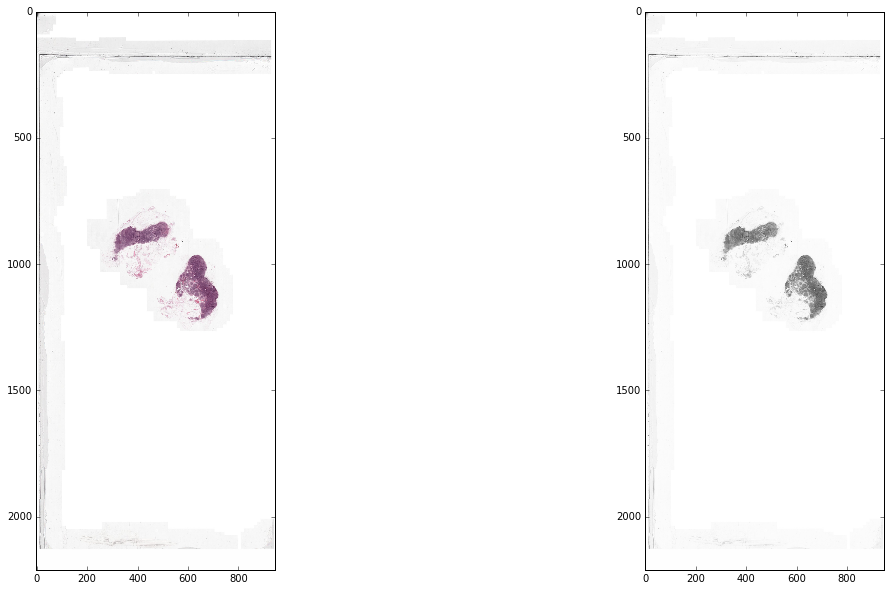

In [7]:
f,axes = plt.subplots(1,2,figsize=(20,10));
ax = axes.ravel()
ax[0].imshow(thumb)
ax[1].imshow(thumb.convert('L'), cmap='Greys_r');

In [8]:
len(img)

43

In [9]:
import numpy as np

def convert_rgb_to_hsv(normal_wsi):
    rgb_image = np.array(normal_wsi)
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    return hsv_image

In [10]:
convert_rgb_to_hsv(thumb)

array([[[100,   4, 209],
        [100,   4, 208],
        [120,   1, 207],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[100,   4, 174],
        [100,   4, 172],
        [105,   3, 171],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[100,   4, 182],
        [100,   4, 179],
        [105,   3, 177],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       ...,

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]]

In [11]:
##RGB to HSV and Grayscale conversion

hsv_pic = cv2.cvtColor(np.array(thumb), cv2.COLOR_BGR2HSV)
gray_pic = cv2.cvtColor(np.array(thumb), cv2.COLOR_BGR2GRAY)

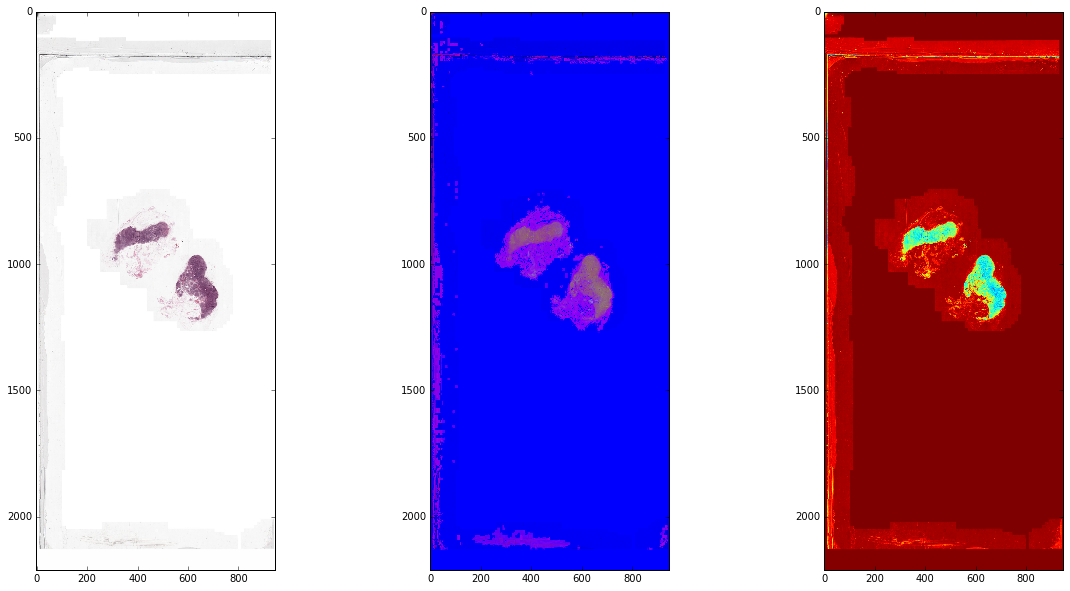

In [12]:
f,axes = plt.subplots(1,3,figsize=(20,10));
ax = axes.ravel()
ax[0].imshow(thumb)
ax[1].imshow(hsv_pic)
ax[2].imshow(gray_pic)

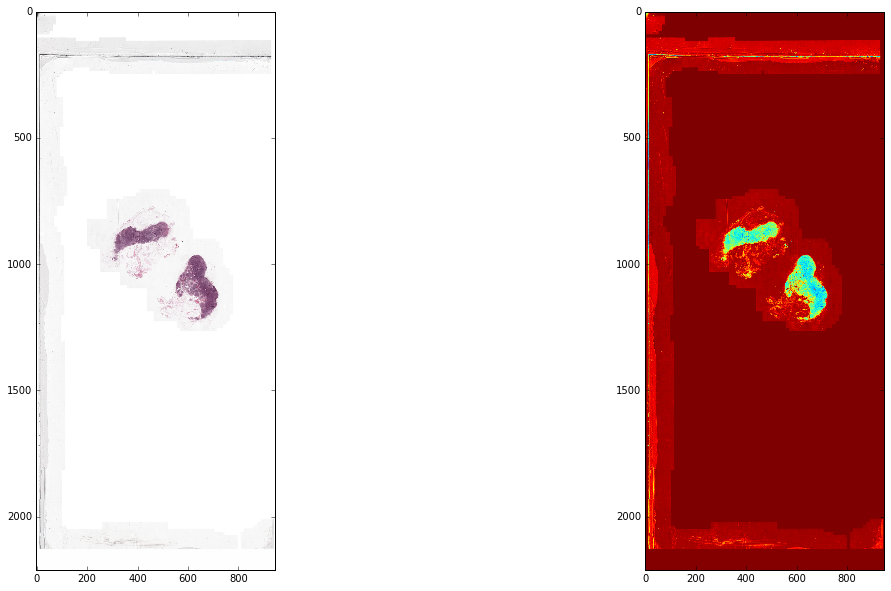

In [13]:
f,axes = plt.subplots(1,2,figsize=(20,10));
ax = axes.ravel()
ax[0].imshow(thumb)
ax[1].imshow(gray_pic)

In [14]:
h,s,v = cv2.split(hsv_pic)

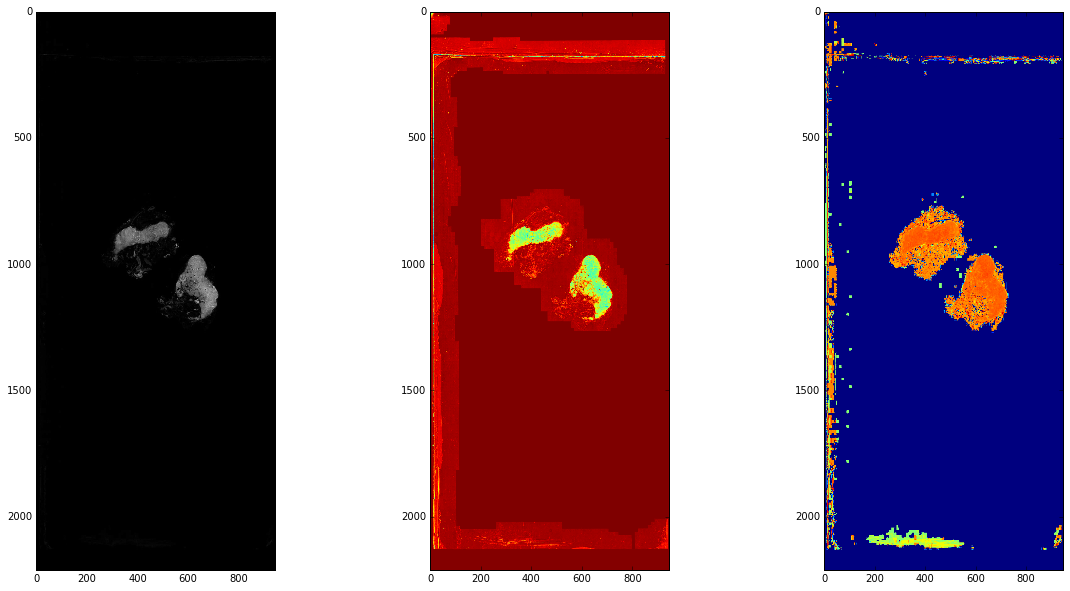

In [15]:
f,axes = plt.subplots(1,3,figsize=(20,10));
ax = axes.ravel()
ax[0].imshow((s),cmap='gray')
ax[1].imshow(v)
ax[2].imshow(h)

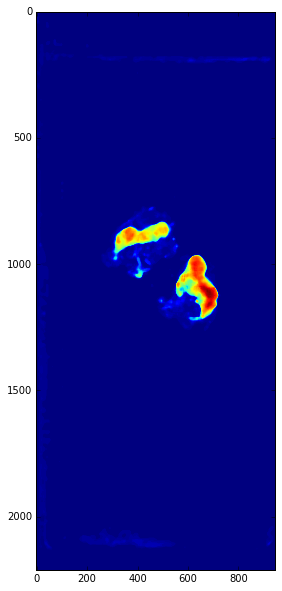

In [16]:
s2 = cv2.medianBlur(s,15)
f1,axes1 = plt.subplots(figsize=(20,10));

axes1.imshow(s2)

(<matplotlib.image.AxesImage at 0x7f11e3fb34e0>,
 <matplotlib.image.AxesImage at 0x7f11e3fb3a20>)

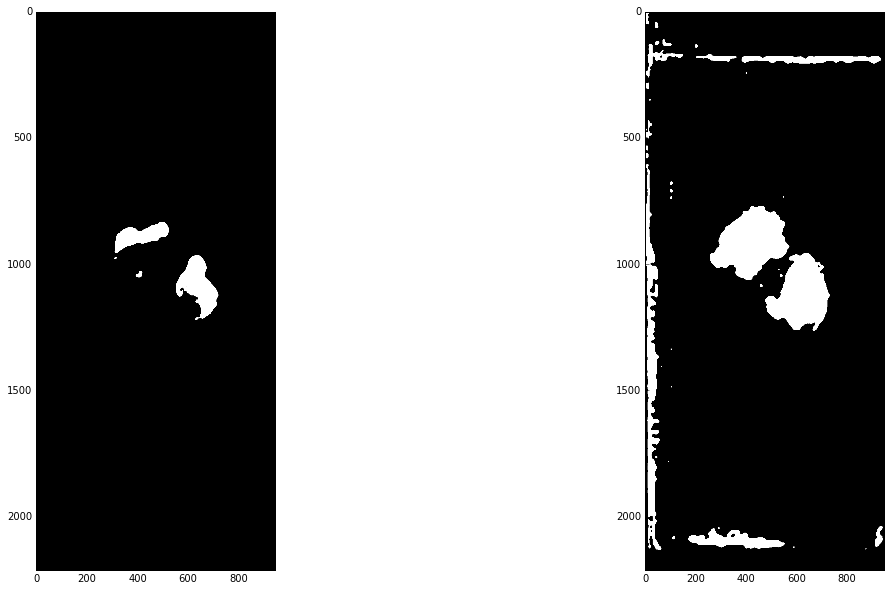

In [17]:
# otsu thresholding

ret, th1 = cv2.threshold(s2, 0, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(s2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig,axes = plt.subplots(1,2,figsize=(20,10))
ax = axes.ravel()
ax[0].imshow((th2),cmap='gray'), ax[1].imshow((th1), cmap ='gray')

In [18]:
def get_countours_from_grayscale (grayscale_img):
    image, contours, hierarchy = cv2.findContours(grayscale_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [19]:
get_countours_from_grayscale(gray_pic)

[array([[[   0,    0]],
 
        [[   0, 2210]],
 
        [[ 946, 2210]],
 
        [[ 946,    0]]], dtype=int32)]

In [19]:
## Draw contours on the ROI

img1 = np.array(thumb)
blurr = cv2.medianBlur(img1, 15)
gray = cv2.cvtColor(blurr, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


_, contours, _ = cv2.findContours(threshold,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x,y,w,h= cv2.boundingRect(c)
    cv2.rectangle(img1,(x,y), (x+w, y+h), (0,255,0),2)
    
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    cv2.drawContours(img1,[box], 0, (0,0,255))
    
    (x,y), radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    img1 = cv2.circle(img1, center, radius,(255,0,0),2)
    
print (len(contours))
cv2.drawContours(img1, contours, -1, (255,255,0),1)

cv2.imshow("contours",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

2


In [21]:
#len(contours)

In [22]:
def get_bboxes_from_contours(contours):
    boundingboxes = [cv2.boundingboxes(c) for c in countours]
    return boundingboxes